In [14]:
A = np.random.rand(100,100)
l = metodo_de_la_potencia(A,100)
aval_calculado = l[-1]
v = np.random.rand(100)

In [15]:
aval_calculado

50.46014292950843

In [2]:
from numpy.linalg import norm, eigvals
import numpy as np
import matplotlib.pyplot as plt

### Ejercicio 1

In [3]:
def coef_rayleigh(A, v):
    return (v.T@A@v)/(v.T@v)

def metodo_de_la_potencia(A, k):
    n = A.shape[0]
    v = np.random.rand(n)
    
    a = []
    for i in range(k):
        v = A@v
        v /= norm(v, 2)
        r = coef_rayleigh(A,v)
        a.append(r)
    
    return a

### Ejercicio 2

In [5]:
A = np.random.rand(100,100)
l100 = metodo_de_la_potencia(A, 100)

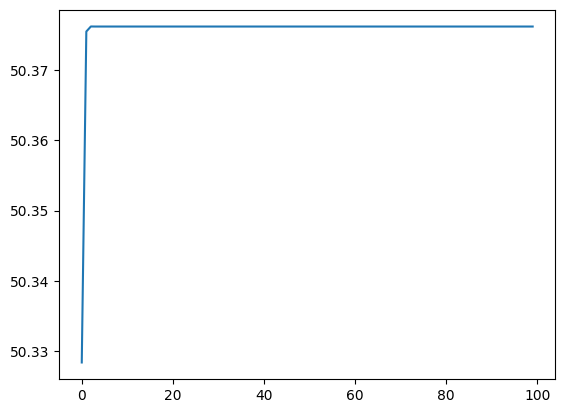

In [8]:
plt.plot(l100)

> El metodo converge muy rapidamente. De hecho **en la primera iteracion** ya obtenemos un valor bastante cercano al autovalor.

### Ejercicio 3

In [193]:
def avals_modulo_maximo(A):
    return sorted(eigvals(A), key=lambda l: abs(l), reverse=True)

def calcular_errores(A, ls):
    l_max = avals_modulo_maximo(A)[0]
    errores = [abs(l_max - ai) for ai in ls]
    return errores

def analisis_con_graficos(A, ls, errores, K=None):
    #Ploteo Error
    plt.figure(figsize=(5,5))
    plt.plot(errores)
    titulo = f"Error vs numero de iteracion para K={K}" if K else "Error vs numero de iteracion"
    plt.title(titulo)

    #Ploteo Logaritmo del Error
    plt.figure(figsize=(5,5))
    
    log_errores = [np.log(e) for e in errores]
    plt.plot(log_errores)
    titulo = f"Log Error vs numero de iteracion para K={K}" if K else "Log Error vs numero de iteracion"
    plt.title(titulo)
    
    e0 = errores[0]
    l1, l2 = np.abs(avals_modulo_maximo(A)[:2])
    y = [2*np.log(l2/l1)*x + np.log(e0) for x in range(100)]

    #Quiero que el eje Y vaya desde -e0 hasta e0. Uso min para que se vea todo el grafico si no entra.
    plt.ylim(min(-e0, log_errores[-1] - 1), e0)
    plt.plot(y)

    plt.legend(["Logaritmo del Error", "2*log(l2/l1) + log(e0)"])

In [194]:
C = np.random.rand(100,100)
A = (1/2)*(C+C.T)
B = A + 500*np.eye(100)

In [195]:
l100 = metodo_de_la_potencia(B, 100)
errores = calcular_errores(B, l100)

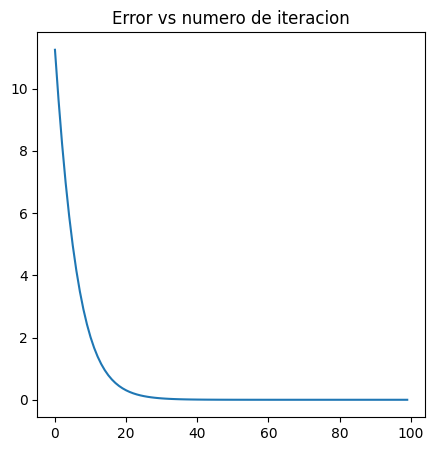

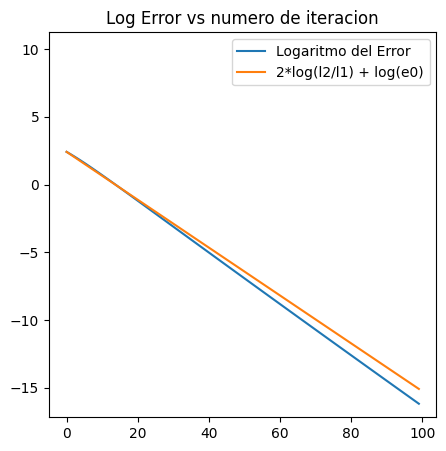

In [196]:
analisis_con_graficos(B, l100, errores)

### Ejercicio 4

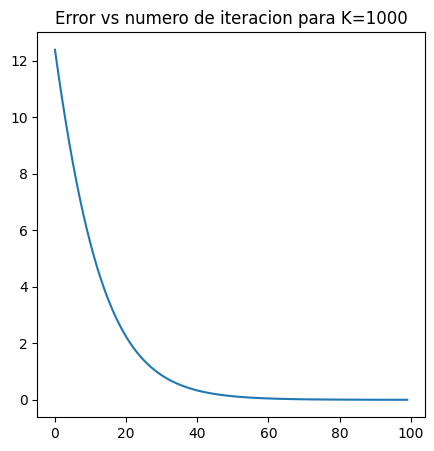

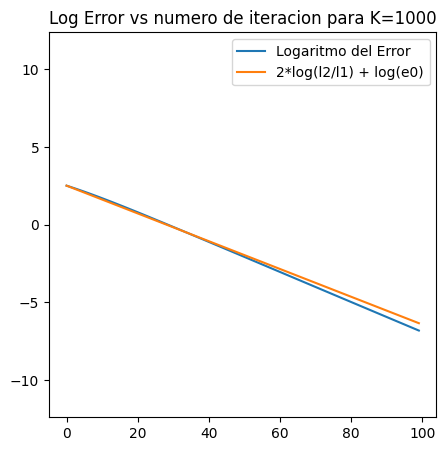

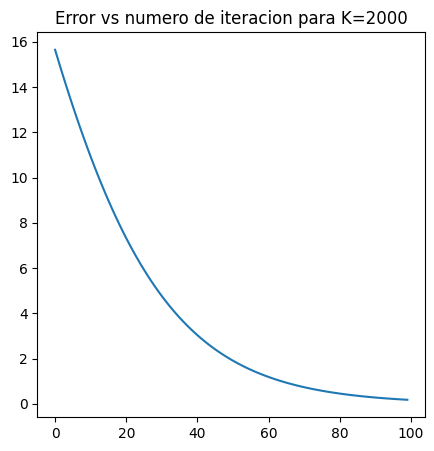

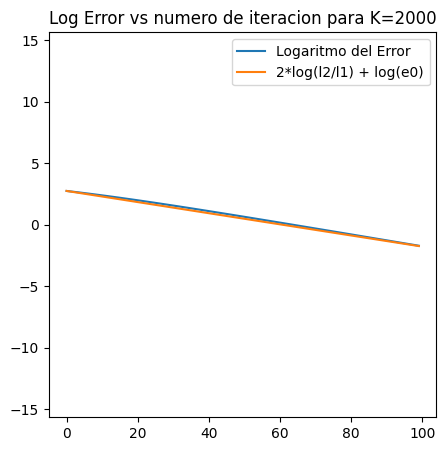

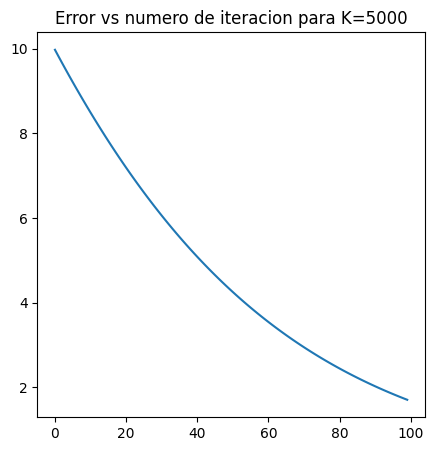

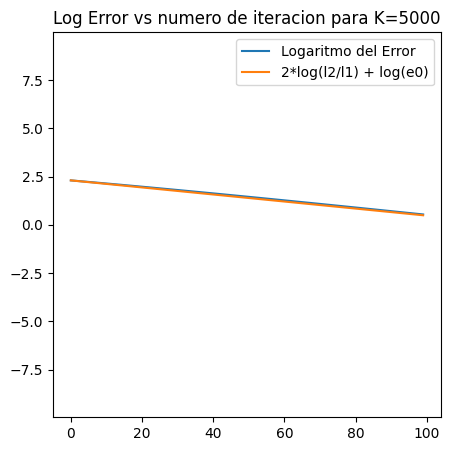

In [197]:
C = np.random.rand(100,100)
A = (1/2)*(C+C.T)

for K in [1000, 2000, 5000]:
    B = A + K*np.eye(100)

    l100 = metodo_de_la_potencia(B, 100)    
    errores = calcular_errores(B, l100)
    
    analisis_con_graficos(B, l100, errores, K)

In [198]:
#CONJETURA: B se parece cada vez mas a una matriz diagonal
#cuyos autovalores tienden a K

In [123]:
np.log(l2/l1)*100

-0.9283810337032024